# Task - 2
## Linear Regression Task

## Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score

## Dataset using Indian House Pries:

In [69]:
df = pd.read_csv(r"C:\Users\mades\Downloads\House Price India\House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [6]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,7.682263,1801.676654,296.480197,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,1.174917,833.737588,448.566731,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


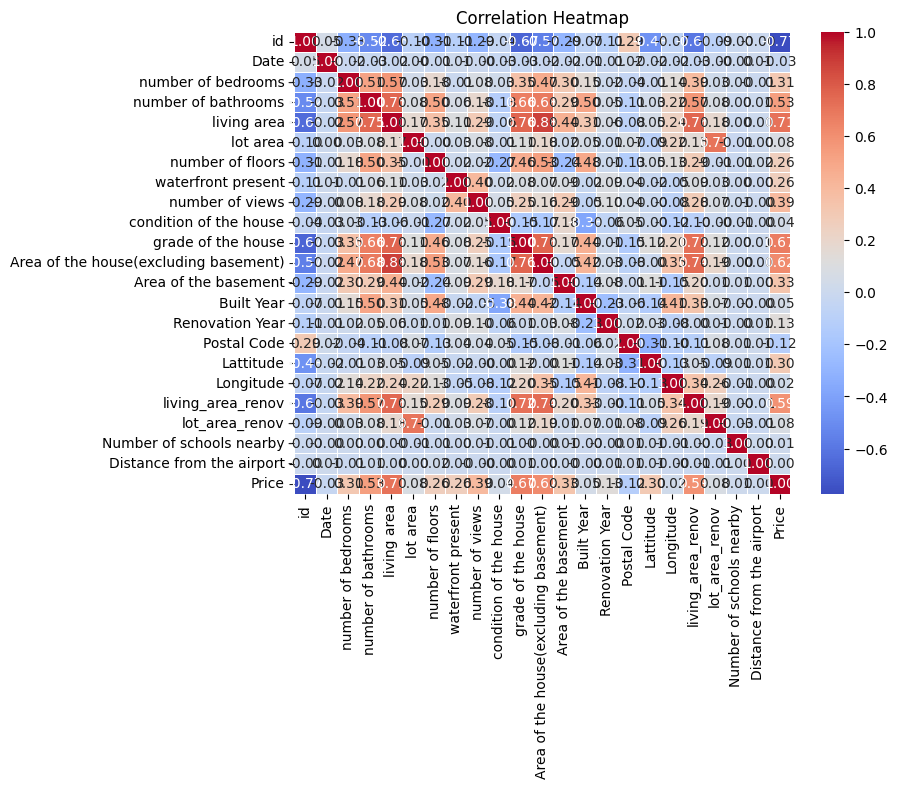

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

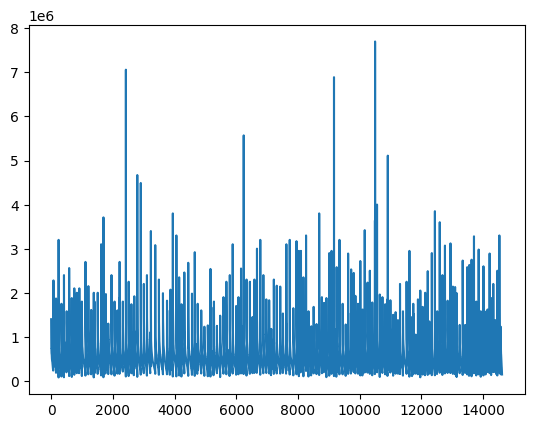

In [9]:
plt.plot(df['Price'])

## Split the dataset into training and testing sets

In [10]:
x = df.drop(['Price'],axis=1)

In [11]:
y = df['Price']

In [12]:
x

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54


In [13]:
y

0        1400000
1        1200000
2         838000
3         805000
4         790000
          ...   
14614     221700
14615     219200
14616     209000
14617     205000
14618     146000
Name: Price, Length: 14619, dtype: int64

In [14]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=222)

## Train the Linear Regression model

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Make predictions

In [17]:
prediction=model.predict(x_test)
prediction

array([378777.52597046, 661627.60968018, 323912.21987915, ...,
       857230.22283936, 457784.35391235, 468113.61315918])

In [66]:
data_point = np.array([[6762830250, 42734, 2, 1.50, 1556, 20000, 1.0, 0, 0, 4, 7, 1556, 0, 1957, 0, 122066, 52.6191, -114.472, 2250, 17286, 3, 76]])
model.predict(data_point)

C:\Users\mades\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([262603.11193848])

## Evaluate the model

In [18]:
mse = mean_squared_error(y_test, prediction)
r2 = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 34004479695.798836
R-squared: 34004479695.798836


In [56]:
model.intercept_

153879544259.66467

In [60]:
model.coef_

array([-2.27743387e+01, -4.52681156e+00, -3.42706208e+04,  2.87813822e+04,
        9.80490816e+01, -2.50419299e-01, -2.21587957e+04,  4.42662560e+05,
        4.08264320e+04,  1.32797617e+04,  5.45196373e+04,  7.36193538e+01,
        2.44297278e+01, -1.65531188e+03,  1.08061220e+01,  1.00690429e+03,
        1.75592141e+05, -9.09848922e+04, -2.64604039e+01, -2.20585386e-01,
        3.05622186e+02, -1.65712335e+02])

## Visualize the regression line with data points

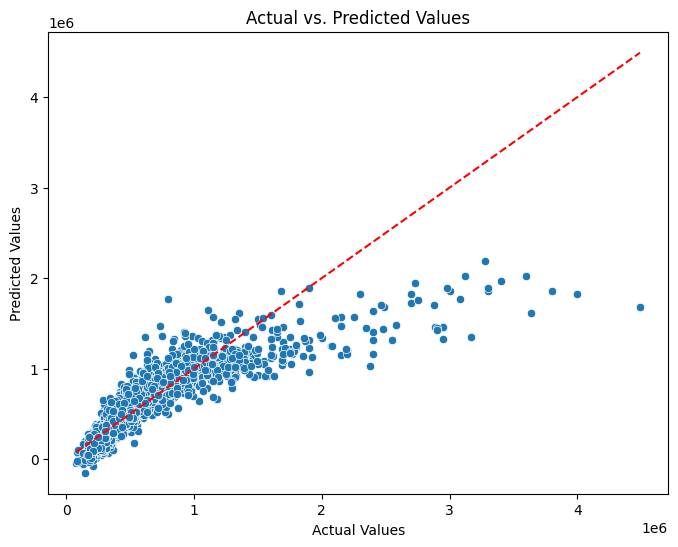

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_actual and y_predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


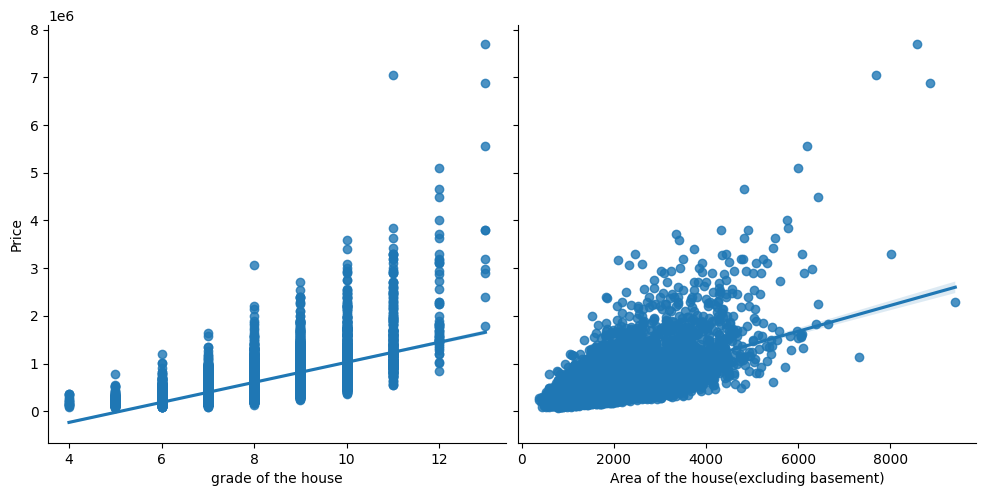

In [55]:
sns.pairplot(data=df, x_vars=['grade of the house', 'Area of the house(excluding basement)'], y_vars='Price', kind='reg', height=5)
plt.show()
